In [20]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = "Resources/pollution_us_2000_2016.csv"
df = pd.read_csv(csv_path)

In [22]:
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
#efficient way to extract year from string format date
df['year'] = pd.DatetimeIndex(df['Date Local']).year
df['month'] = pd.DatetimeIndex(df['Date Local']).month
df['Date Local'] = pd.to_datetime(df['Date Local'],format='%Y-%m-%d') 

In [23]:
# Delete extraneous column
df = df.drop(['Unnamed: 0','State Code','County Code','Address','Site Num','NO2 Units','O3 Units','SO2 Units','CO Units'], axis=1)
# Removing Mexico
df = df[df.State!='Country Of Mexico']
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,month
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000,1
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000,1
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000,1
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000,1
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000,1


In [24]:
df.State.unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Arkansas', 'Oregon', 'Wyoming', 'North Dakota',
       'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii', 'Minnesota',
       'New Mexico', 'Rhode Island', 'South Dakota', 'Utah', 'Alabama',
       'Washington', 'Alaska'], dtype=object)

In [25]:
df_grouped = df.groupby(['State','Date Local']).mean()
df_grouped.head()

NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour  NO2 AQI  \
State   Date Local                                                            
Alabama 2013-12-01  17.208333               39.3              18.0     37.0   
        2013-12-02  20.687500               32.4               7.0     30.0   
        2013-12-03  14.912500               22.4              17.0     21.0   
        2013-12-04   7.825000               19.3              17.0     18.0   
        2013-12-05   8.004762               16.0               7.0     15.0   

                     O3 Mean  O3 1st Max Value  O3 1st Max Hour  O3 AQI  \
State   Date Local                                                        
Alabama 2013-12-01  0.013542             0.026              9.0    24.0   
        2013-12-02  0.009375             0.013              0.0    12.0   
        2013-12-03  0.008167             0.012             22.0    11.0   
        2013-12-04  0.011125             0.014              8.0    13.0   
        2013-12-05  0.010083             0.014             18.0    13.0   

                    SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour  SO2 AQI  \
State   Date Local                                                           
Alabama 2013-12-01  0.285390               0.75              11.0      1.0   
        2013-12-02  0.531666               2.10              11.0      3.0   
        2013-12-03  0.252632               1.35              12.5      3.0   
        2013-12-04  0.123052               0.95              17.0      1.0   
        2013-12-05 -0.014285               0.60               2.5      1.0   

                     CO Mean  CO 1st Max Value  CO 1st Max Hour  CO AQI  \
State   Date Local                                                        
Alabama 2013-12-01  0.262879             0.650              8.5     6.0   
        2013-12-02  0.352812             0.485              8.0     6.0   
        2013-12-03  0.237575             0.325              4.0     3.0   
        2013-12-04  0.115152             0.220             18.5     2.0   
        2013-12-05  0.117575             0.200             17.5     2.0   

                      year  month  
State   Date Local                 
Alabama 2013-12-01  2013.0   12.0  
        2013-12-02  2013.0   12.0  
        2013-12-03  2013.0   12.0  
        2013-12-04  2013.0   12.0  
        2013-12-05  2013.0   12.0

In [26]:
# Dropping the NA values at this point would end up losing a lot of data for O3 and CO2 data, so we want to maintain separate dfs once we get to that point. 

In [27]:
#NO2 data
NO2_data = df[["State", "County", "City","NO2 Mean","NO2 1st Max Value", "NO2 1st Max Hour", "NO2 AQI","Date Local","year"
                          ]]
NO2_data.head()

,State,County,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Date Local,year
0,Arizona,Maricopa,Phoenix,19.041667,49.0,19,46,2000-01-01,2000
1,Arizona,Maricopa,Phoenix,19.041667,49.0,19,46,2000-01-01,2000
2,Arizona,Maricopa,Phoenix,19.041667,49.0,19,46,2000-01-01,2000
3,Arizona,Maricopa,Phoenix,19.041667,49.0,19,46,2000-01-01,2000
4,Arizona,Maricopa,Phoenix,22.958333,36.0,19,34,2000-01-02,2000


In [28]:
#NO2 data group it 
NO2_group = df[["State","County","City","NO2 AQI","Date Local","year"
                          ]]
NO2_group.head()

,State,County,City,NO2 AQI,Date Local,year
0,Arizona,Maricopa,Phoenix,46,2000-01-01,2000
1,Arizona,Maricopa,Phoenix,46,2000-01-01,2000
2,Arizona,Maricopa,Phoenix,46,2000-01-01,2000
3,Arizona,Maricopa,Phoenix,46,2000-01-01,2000
4,Arizona,Maricopa,Phoenix,34,2000-01-02,2000


In [29]:
# Grouping the DataFrame by "Assignee"
citycounty_group = NO2_group.groupby(["State","County","City"])

citycounty_group


In [30]:
# Count how many of each component Assignees worked on and create DataFrame of the data
citycounty_grpdisplay = pd.DataFrame(citycounty_group["City"].value_counts())
citycounty_grpdisplay

City
State        County                City               City                     
Alabama      Jefferson             Birmingham         Birmingham           3126
Alaska       Fairbanks North Star  Fairbanks          Fairbanks            1974
Arizona      Maricopa              Phoenix            Phoenix             37912
                                   Scottsdale         Scottsdale           8674
             Pima                  Tucson             Tucson              23254
Arkansas     Pulaski               North Little Rock  North Little Rock   35332
California   Alameda               Berkeley           Berkeley             4460
                                   Oakland            Oakland              9746
             Contra Costa          Bethel Island      Bethel Island       23396
                                   Concord            Concord             23686
                                   Crockett           Crockett             1892
                                   Pittsburg          Pittsburg           13076
                                   San Pablo          San Pablo           21960
             Fresno                Fresno             Fresno              15302
             Humboldt              Eureka             Eureka              12200
                                   Not in a city      Not in a city        6346
             Imperial              Calexico           Calexico            22420
             Kern                  Bakersfield        Bakersfield           434
             Los Angeles           Burbank            Burbank             18870
                                   Hawthorne          Hawthorne            6046
                                   Long Beach         Long Beach          25104
                                   Los Angeles        Los Angeles         42241
                                   West Los Angeles   West Los Angeles     1120
             Orange                Costa Mesa         Costa Mesa          21606
             Riverside             Rubidoux           Rubidoux            30178
             Sacramento            Arden-Arcade       Arden-Arcade        19878
                                   Not in a city      Not in a city       13154
             San Bernardino        Fontana            Fontana             10694
                                   Victorville        Victorville         23279
             San Diego             Chula Vista        Chula Vista         14612
...                                                                         ...
South Dakota Union                 Not in a city      Not in a city        1404
Tennessee    Blount                Not in a city      Not in a city        3974
             Haywood               Not in a city      Not in a city         904
             Meigs                 Not in a city      Not in a city         964
Texas        Bexar                 Not in a city      Not in a city        3368
                                   San Antonio        San Antonio          3574
             Dallas                Dallas             Dallas              23406
             El Paso               El Paso            El Paso             36908
             Harris                Deer Park          Deer Park            7676
                                   Houston            Houston             33626
             McLennan              Waco               Waco                12480
             Travis                Austin             Austin               2170
Utah         Duchesne              Roosevelt          Roosevelt             104
             Salt Lake             Salt Lake City     Salt Lake City       6580
             Uintah                Not in a city      Not in a city        1984
Virginia     Alexandria City       Alexandria         Alexandria           5876
                                   Not in a city      Not in a city        1060
             Fairfax               Annandale          Annandale            

In [31]:
#O3 data

O3_data = df[["State", "County", "City","O3 Mean","O3 1st Max Value", "O3 1st Max Hour", "O3 AQI","Date Local","year"
                          ]]
O3_data.head()

,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,Date Local,year
0,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34,2000-01-01,2000
1,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34,2000-01-01,2000
2,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34,2000-01-01,2000
3,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34,2000-01-01,2000
4,Arizona,Maricopa,Phoenix,0.013375,0.032,10,27,2000-01-02,2000


In [32]:
# the following two groupbys need a dropped dataframe
df_drop = df.dropna(how='any')
df_drop.count()

State                434493
County               434493
City                 434493
Date Local           434493
NO2 Mean             434493
NO2 1st Max Value    434493
NO2 1st Max Hour     434493
NO2 AQI              434493
O3 Mean              434493
O3 1st Max Value     434493
O3 1st Max Hour      434493
O3 AQI               434493
SO2 Mean             434493
SO2 1st Max Value    434493
SO2 1st Max Hour     434493
SO2 AQI              434493
CO Mean              434493
CO 1st Max Value     434493
CO 1st Max Hour      434493
CO AQI               434493
year                 434493
month                434493
dtype: int64

In [33]:
#SO2 data
SO2_data = df_drop[["State","County", "City","SO2 Mean","SO2 1st Max Value", "SO2 1st Max Hour", "SO2 AQI","Date Local","year"
                   ]]
SO2_data.head()

,State,County,City,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,Date Local,year
1,Arizona,Maricopa,Phoenix,3.000000,9.0,21,13.0,2000-01-01,2000
5,Arizona,Maricopa,Phoenix,1.958333,3.0,22,4.0,2000-01-02,2000
9,Arizona,Maricopa,Phoenix,5.250000,11.0,19,16.0,2000-01-03,2000
13,Arizona,Maricopa,Phoenix,7.083333,16.0,8,23.0,2000-01-04,2000
17,Arizona,Maricopa,Phoenix,8.708333,15.0,7,21.0,2000-01-05,2000


In [34]:
#CO data
CO_data = df_drop[["State", "County", "City","CO Mean","CO 1st Max Value", "CO 1st Max Hour", "CO AQI", "Date Local","year"
                  ]]
state_CO_data = CO_data.groupby(['State','year']).mean()

In [35]:
state_CO_data.sort_values('CO AQI', ascending=False)

CO Mean  CO 1st Max Value  CO 1st Max Hour  \
State                year                                                
District Of Columbia 2000  1.178786          1.630220         9.708791   
                     2001  1.077945          1.520344         9.535817   
                     2002  1.161151          1.504110         9.194521   
                     2008  1.222816          1.396389         7.800000   
                     2007  1.199608          1.383383         8.246291   
                     2006  1.117963          1.342192         7.536986   
Arizona              2000  0.746075          1.330795         8.448864   
District Of Columbia 2003  0.898858          1.277285         9.274238   
Arizona              2002  0.707596          1.199003         8.894795   
                     2001  0.652423          1.162115         8.360132   
District Of Columbia 2005  0.851512          1.141160         8.328729   
Louisiana            2001  0.827924          1.115278         7.905556   
Arizona              2003  0.633904          1.071195         7.700629   
Indiana              2000  0.875499          1.067066         8.461078   
District Of Columbia 2010  0.885578          1.048901         7.837912   
                     2009  0.867906          1.044751         8.301105   
Colorado             2001  0.630548          1.041121         8.510903   
Louisiana            2000  0.758775          1.019126         7.472678   
Colorado             2000  0.615031          1.013151         8.813699   
California           2000  0.647508          0.990573         7.738905   
Arizona              2005  0.620166          0.972368         7.496537   
Kansas               2000  0.756692          0.971138         7.348238   
Illinois             2000  0.706236          0.971165         9.663352   
Tennessee            2002  1.000000          1.000000         0.328767   
                     2003  1.000000          1.000000         0.000000   
Louisiana            2002  0.717476          0.961159         8.411594   
District Of Columbia 2004  0.619778          0.928846         9.217033   
California           2001  0.625402          0.932492         7.539379   
Colorado             2004  0.619115          0.926239         8.743440   
Massachusetts        2002  0.401211          0.657884        10.348548   
...                             ...               ...              ...   
Virginia             2010  0.118647          0.188012         5.371345   
South Dakota         2013  0.165809          0.197848         3.088953   
North Dakota         2011  0.166500          0.196802         2.773256   
Tennessee            2010  0.181094          0.196751         1.855596   
                     2015  0.169218          0.194372         2.458874   
North Dakota         2014  0.161725          0.192532         2.808442   
Tennessee            2009  0.163499          0.188924         2.651899   
North Dakota         2013  0.156186          0.184800         3.004000   
South Carolina       2006  0.145773          0.184483         4.669540   
                     2007  0.131799          0.173267         4.320132   
Pennsylvania         2016  0.097009          0.162874         4.676647   
Wyoming              2011  0.120496          0.154566         4.004454   
South Carolina       2008  0.128204          0.159443         3.470588   
Nevada               2001  0.069565          0.141304         5.826087   
Oklahoma             2002  0.060129          0.146087         4.491304   
Wyoming              2008  0.066271          0.122186         4.125402   
Oklahoma             2000  0.047210          0.119776         4.272388   
Indiana              2011  0.056847          0.118478         3.913043   
Wyoming              2016  0.095296          0.115556         1.900000   
South Carolina       2010  0.087068          0.111207         1.900862   
Nevada               2002  0.046834          0.098851         3.836207   
Oklahoma             2003  0.042

In [146]:
# Separating the Louisiana data 
la = df[df.State=='District Of Columbia'][["NO2 AQI","SO2 AQI","CO AQI","Date Local","year","month"
                   ]]
wy = df[df.State=='Kansas'][["NO2 AQI","SO2 AQI","CO AQI","Date Local","year","month"
                   ]]
us = df[["NO2 AQI","SO2 AQI","CO AQI","O3 AQI","Date Local","year","month"
                   ]]

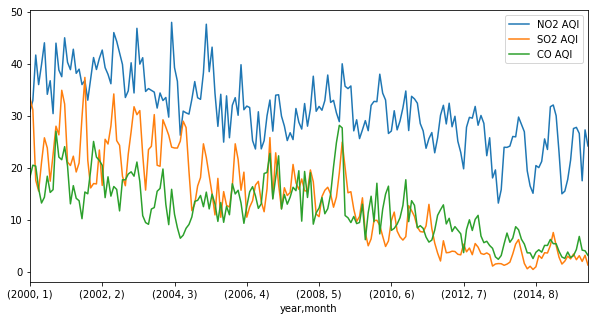

In [138]:
lamean = la.groupby(['year','month']).mean()
lamean.plot(figsize=(10,5))

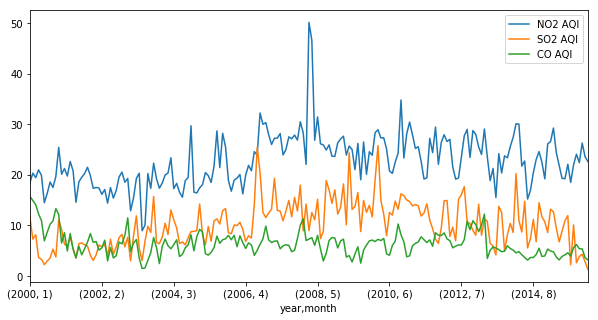

In [142]:
wymean = wy.groupby(['year','month']).mean()
wymean.plot(figsize=(10,5))

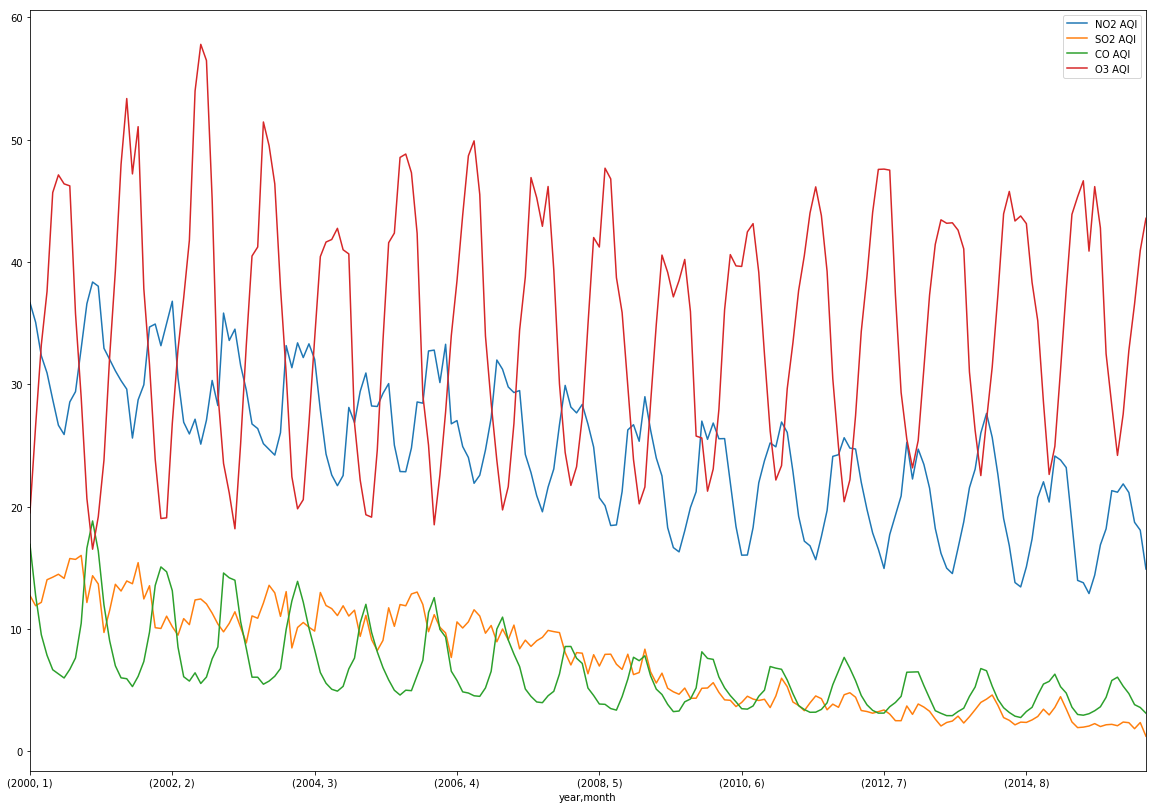

In [148]:
usmean = us.groupby(['year','month']).mean()
usmean.plot(figsize = (20,14))